In [64]:
pwd

'C:\\Users\\jeang'

# Charge et exploration de données

In [41]:
# download the data from web and saved to local directory
# put the data in a variable make the following code usable for any data sources
data_dir = "C:\\Users\\jeang\\Documents\\BDEB\\A62\\ProSyn3\\data"

In [42]:
import pandas as pd

In [43]:
# Original data is hold by df
df = pd.read_csv(data_dir + "\\fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [44]:
df.shape

(35887, 3)

In [45]:
df.Usage.unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [46]:
df.Usage.value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [48]:
df['length'] = df.pixels.apply(lambda x: len(str(x).split(' ')))
df.head()

,emotion,pixels,Usage,length
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,2304
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,2304
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,2304
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,2304
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,2304


In [49]:
df.emotion.value_counts(normalize=True)

3    0.250481
6    0.172709
4    0.169337
2    0.142698
0    0.138017
5    0.111517
1    0.015242
Name: emotion, dtype: float64

# Nettoyage de données

In [50]:
no_data = sum(df.length.isna())
no_data

0

* Nous constatons que Les données n'ont pas de valeur manquante 
* La distribution des emotions montre qu'il y a plus de catégorie 3 et moins de catégorie 1

# Points particulier

<AxesSubplot:ylabel='Frequency'>

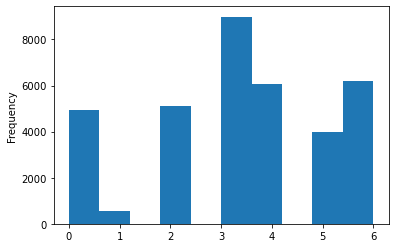

In [51]:
df.emotion.plot.hist()

* Les données contient essentiellement deux colonnes: emotion est la cible (catégories) et pixels l'image 48x48 = 2304

* L'autre colonne, Usage, est une parition des données: Training, PublicTest, PrivateTest
* Nous allons utiliser la partie Training pour developper le modele et PrivateTest pour tester notre modele
* En fin, la partie PublicTest sera utilisée pour la validation

# Transformation
* Le data type pour pixels devrais être integer entre 0 et 255 au lieu de string 

In [65]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [78]:
data = df.pixels.apply(lambda x: [int(p) for p in str(x).split(' ')])
cible = df.emotion
usage = df.Usage

In [79]:
trans_df = pd.DataFrame({'face': data, 'y': cible, 'Used': usage}, index=df.index)
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   face    35887 non-null  object
 1   y       35887 non-null  int64 
 2   Used    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [80]:
trans_df.head()

,face,y,Used
0,"[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4...",0,Training
1,"[151, 150, 147, 155, 148, 133, 111, 140, 170, ...",0,Training
2,"[231, 212, 156, 164, 174, 138, 161, 173, 182, ...",2,Training
3,"[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, 2...",4,Training
4,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23...",6,Training


In [84]:
images = np.zeros((df.shape[0], 2304))
images.shape

(35887, 2304)

In [86]:
for i in range(images.shape[0]):
    images[i] = data[i]

In [88]:
for i in range(4):
    print(images[i])

[ 70.  80.  82. ... 106. 109.  82.]
[151. 150. 147. ... 193. 183. 184.]
[231. 212. 156. ...  88. 110. 152.]
[ 24.  32.  36. ... 142. 143. 142.]


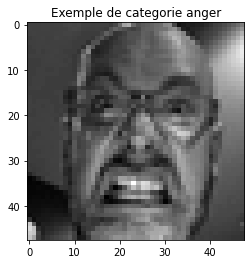

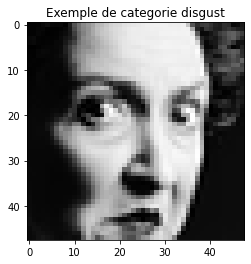

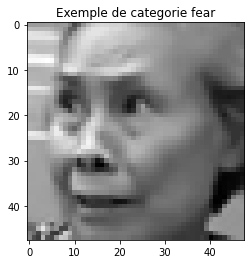

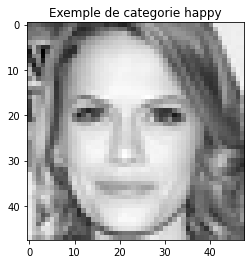

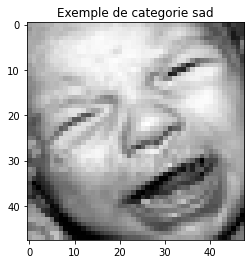

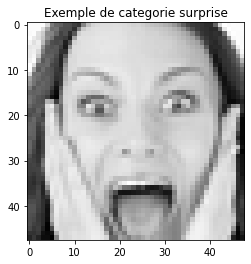

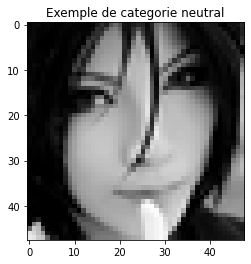

In [104]:
num_cat, categories = 7, {0:'anger', 1:"disgust", 2:'fear', 3:'happy', 4:'sad', 5:'surprise',6:'neutral'}
faces = np.zeros((num_cat, 2304))
for image in range(num_cat):
    plt.figure(image)   
    faces[image] = np.random.choice(trans_df.face[trans_df.y==image])
    plt.imshow(faces[image].reshape((48,48)), interpolation='none', cmap='gray')
    plt.title(f"Exemple de categorie {categories[image]}")
plt.show()

In [106]:
train_set = trans_df[trans_df.Used == 'Training'].copy()
train_set.shape

(28709, 3)

In [107]:
train_set.drop(["Used"], axis=1, inplace=True)
train_set.head()

,face,y
0,"[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4...",0
1,"[151, 150, 147, 155, 148, 133, 111, 140, 170, ...",0
2,"[231, 212, 156, 164, 174, 138, 161, 173, 182, ...",2
3,"[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, 2...",4
4,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23...",6


In [108]:
train_set.y.value_counts(normalize=True)

3    0.251315
6    0.172942
4    0.168240
2    0.142708
0    0.139155
5    0.110453
1    0.015187
Name: y, dtype: float64

<AxesSubplot:ylabel='Frequency'>

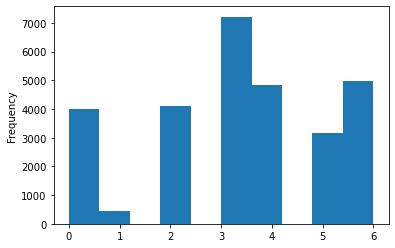

In [109]:
train_set.y.plot.hist()

In [111]:
test_set = trans_df[trans_df.Used == "PrivateTest"].copy()
test_set.shape

(3589, 3)

In [112]:
test_set.drop(['Used'], axis=1, inplace=True)
test_set.head()

,face,y
32298,"[170, 118, 101, 88, 88, 75, 78, 82, 66, 74, 68...",0
32299,"[7, 5, 8, 6, 7, 3, 2, 6, 5, 4, 4, 5, 7, 5, 5, ...",5
32300,"[232, 240, 241, 239, 237, 235, 246, 117, 24, 2...",6
32301,"[200, 197, 149, 139, 156, 89, 111, 58, 62, 95,...",4
32302,"[40, 28, 33, 56, 45, 33, 31, 78, 152, 194, 200...",2


In [113]:
test_set.y.value_counts(normalize=True)

3    0.244915
6    0.174422
4    0.165506
2    0.147116
0    0.136807
5    0.115910
1    0.015325
Name: y, dtype: float64

<AxesSubplot:ylabel='Frequency'>

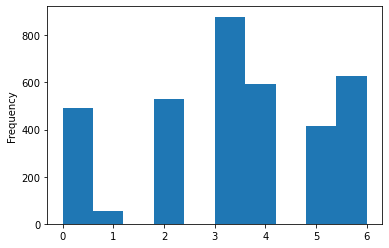

In [114]:
test_set.y.plot.hist()

In [115]:
valid_set = trans_df[trans_df.Used == "PublicTest"].copy()
valid_set.shape

(3589, 3)

In [116]:
valid_set.drop(['Used'], axis=1, inplace=True)
valid_set.head()

,face,y
28709,"[254, 254, 254, 254, 254, 249, 255, 160, 2, 58...",0
28710,"[156, 184, 198, 202, 204, 207, 210, 212, 213, ...",1
28711,"[69, 118, 61, 60, 96, 121, 103, 87, 103, 88, 7...",4
28712,"[205, 203, 236, 157, 83, 158, 120, 116, 94, 86...",6
28713,"[87, 79, 74, 66, 74, 96, 77, 80, 80, 84, 83, 8...",3


In [117]:
valid_set.y.value_counts(normalize=True)

3    0.249373
4    0.181945
6    0.169128
2    0.138200
0    0.130120
5    0.115631
1    0.015603
Name: y, dtype: float64

<AxesSubplot:ylabel='Frequency'>

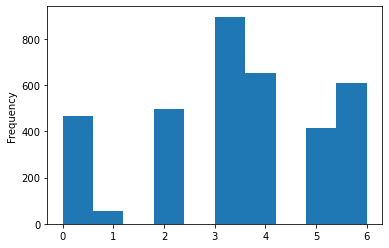

In [118]:
valid_set.y.plot.hist()

* On constate que la distribution de catégorie dans les différentes parties sont semblable